<a href="https://colab.research.google.com/github/yesong98/Exploration/blob/main/Exploration5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능과 가위바위보하기

In [256]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))
#print(tf.__version__)
#print(np.__version__)

2.8.2
60000


## 데이터 불러오기 + Resize 하기

In [270]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [272]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [273]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


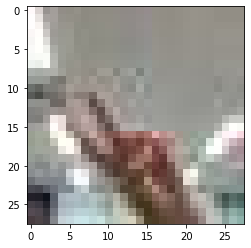

In [274]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기
-  가위바위보를 인식하는 딥러닝 네트워크를 설계해보기

In [275]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(300, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(200, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(200, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 26, 26, 300)       8400      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 13, 13, 300)      0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 11, 11, 200)       540200    
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 5, 5, 200)        0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 3, 3, 200)         360200    
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 1, 1, 200)      

## 딥러닝 네트워크 학습시키기

In [276]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 4s 337ms/step - loss: 1.1101 - accuracy: 0.3233
Epoch 2/10
10/10 [==============================] - 3s 335ms/step - loss: 0.9893 - accuracy: 0.5167
Epoch 3/10
10/10 [==============================] - 3s 333ms/step - loss: 0.6446 - accuracy: 0.7633
Epoch 4/10
10/10 [==============================] - 4s 369ms/step - loss: 0.4209 - accuracy: 0.7600
Epoch 5/10
10/10 [==============================] - 3s 333ms/step - loss: 0.2957 - accuracy: 0.9100
Epoch 6/10
10/10 [==============================] - 3s 331ms/step - loss: 0.2207 - accuracy: 0.9067
Epoch 7/10
10/10 [==============================] - 3s 334ms/step - loss: 0.1122 - accuracy: 0.9700
Epoch 8/10
10/10 [==============================] - 3s 336ms/step - loss: 0.0570 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 3s 336ms/step - loss: 0.0491 - accuracy: 0.9900
Epoch 10/10
10/10 [==============================] - 3s 331ms/step - loss: 0.0137 - accuracy: 0.9933

## 잘 만들었는지 확인하기(테스트)

In [277]:
	# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/SBS/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/jumi_rcp/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [278]:
#테스트 데이터셋의 크기를 28 x 28로 변경
resize_images("/content/drive/MyDrive/aiffel/rock_scissor_paper/SBS/scissor")
resize_images("/content/drive/MyDrive/aiffel/rock_scissor_paper/jumi_rcp/rock")
resize_images("/content/drive/MyDrive/aiffel/rock_scissor_paper/paper")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [279]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/SBS/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/jumi_rcp/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob('/content/drive/MyDrive/aiffel/rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

#테스트 데이터의 각 요소 값을 0 ~ 1 사이로 정규화
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/jumi_rcp/paper/'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0  

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


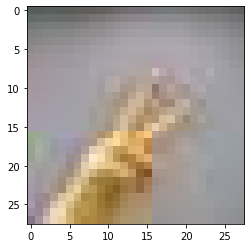

In [280]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [281]:
n_channel_1=50  
n_channel_2=100
n_dense=100
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 26, 26, 50)        1400      
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 13, 13, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 11, 11, 100)       45100     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 5, 5, 100)        0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 2500)              0         
                                                                 
 dense_66 (Dense)            (None, 100)             

# 회고
1. 과정  
train data는 내가 찍은 데이터를 사용하고 test data는 조원 데이터중 Rock은 주미님 데이터에서, paper는 나의 데이터에서, scissor는 성보님 데이터를 가져와 테스트해보았다. 배경이 누가 찍었느냐에 따라 다르고 사람의 손 크기도 다르다고 생각되어 다양한 테스트를 통해 정확도를 알아보고싶었다. 
처음 넣은 값으로는 정확성이 높지 않아 n_channel_1=50, n_channel_2=100, n_dense=100, n_train_epoch=15로 값을 변경하고 난 후 test accuracy가 62%로 나왔다. 

2. 개념
이번 exploration에서 가져갈 개념은 2d 컨볼루션이다.   
- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수이다. 
- Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 이다. 
- 값이 클수록 보다 복잡한 분류기를 만들 수 있다.
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정한다 

3. 분류모델의 test accuracy = 62.99%